In [56]:
import os
import numpy as np
import numpy.matlib

# 获取原始数据路径
path_test_input = "eigenfaces\\faceS"
# 读取训练数据集
data_test_input = np.loadtxt(path_test_input)
data_test_label_raw = np.load('./FaceDataset/Label/test.npy')


In [57]:
# 打印数据集的形状
print("输入形状： " , data_test_input.shape)
print("标签形状： " , data_test_label_raw.shape)

输入形状：  (1996, 100)
标签形状：  (1996, 2)


In [58]:
# 将男性标签替换为1，女性标签替换为0
a = np.char.replace(data_test_label_raw,'female','0')
b = np.char.replace(a,'male','1')
# 将数组从字符串类型转换为int类型
data_test_label = b.astype(int)
# 打印进行查看
print(data_test_label[1807:1809])
print(data_test_label.shape)

[[5034    1]
 [5035    1]]
(1996, 2)


In [59]:
data_only_lael = data_test_label[:,[1]]
test_data = np.concatenate((data_test_input,data_only_lael),axis=1)
test_data.shape

(1996, 101)

In [60]:
test_pure_data = test_data[:,1:100]
test_pure_data.shape

(1996, 99)

In [61]:
W_Mat = np.load('./FaceDataset/W_Mat.npy')
print('shape :', W_Mat.shape)

shape : (99, 1)


In [62]:
test_feature_data = np.matmul(test_pure_data,W_Mat)
print(test_feature_data.shape)

(1996, 1)


In [63]:
# 获得包含特征的完全数据
test_feature = np.concatenate((data_test_label,test_feature_data),axis=1)
print(test_feature[30:50])

[[ 3.25300000e+03+0.j  1.00000000e+00+0.j  1.92487217e+02+0.j]
 [ 3.25400000e+03+0.j  1.00000000e+00+0.j  1.63208303e+02+0.j]
 [ 3.25500000e+03+0.j  1.00000000e+00+0.j  3.25109494e+01+0.j]
 [ 3.25600000e+03+0.j  1.00000000e+00+0.j -1.57657292e+01+0.j]
 [ 3.25700000e+03+0.j  1.00000000e+00+0.j  7.08296722e-01+0.j]
 [ 3.25800000e+03+0.j  0.00000000e+00+0.j -1.81419784e+01+0.j]
 [ 3.25900000e+03+0.j  0.00000000e+00+0.j -4.99333771e+00+0.j]
 [ 3.26000000e+03+0.j  0.00000000e+00+0.j -2.58836012e+01+0.j]
 [ 3.26100000e+03+0.j  0.00000000e+00+0.j  7.63014406e+01+0.j]
 [ 3.26200000e+03+0.j  0.00000000e+00+0.j  9.71266379e+00+0.j]
 [ 3.26300000e+03+0.j  0.00000000e+00+0.j -5.17643356e+01+0.j]
 [ 3.26400000e+03+0.j  0.00000000e+00+0.j  1.21368791e+02+0.j]
 [ 3.26500000e+03+0.j  0.00000000e+00+0.j -1.06420927e+02+0.j]
 [ 3.26600000e+03+0.j  0.00000000e+00+0.j -8.94803776e+01+0.j]
 [ 3.26700000e+03+0.j  0.00000000e+00+0.j  2.70230013e+00+0.j]
 [ 3.26800000e+03+0.j  0.00000000e+00+0.j -9.41691904e+

d:\ProgramData\Anaconda3\envs\for2060\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


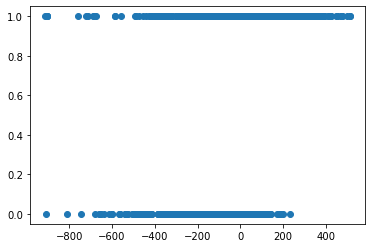

In [64]:
# 绘制散点图，观察特征值的分布情况
import matplotlib.pyplot as plt

plt.scatter(test_feature[:,2],test_feature[:,1])

In [65]:
# 读取模型的中心点
mean = np.load('./FaceDataset/mean.npy')
mean

array([-176.61375408+0.j,   76.31677382+0.j])

In [66]:
# 一些函数
def Cal_distance(x1,x2):
    return (x1-x2)*(x1-x2)

def predict(x,C0,C1):
    if Cal_distance(x,C0)<Cal_distance(x,C1):
        return 0
    else:
        return 1

# 对训练集进行预测
predict_train = np.zeros(1996)
print(predict_train.shape)
j = 0
for line in test_feature:
    predict_train[j] = predict(line[2],mean[0],mean[1])
    j += 1
print(predict_train[0:10])
print(test_feature[0:10,1])

(1996,)
[0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
[0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]


In [67]:
# 验证准确率
cnt = 0
for i in range(0,1996):
    if (predict_train[i] == test_feature[i,1]):
        cnt+=1
acc = cnt/1997
acc

0.7030545818728092

NameError: name 'numpy' is not defined